In [1]:
cd ..

/master


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

import torch
torch.set_num_threads(4)

In [3]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

%matplotlib inline

In [5]:
from skopt import BayesSearchCV

from utils.visualize import plot_2D_decision_boundary_SSL
from utils.data import get_train_dev_test_ssl, DATASETS
from utils.data.helpers import merge_train_dev

from sklearn.neural_network import MLPClassifier
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta

# Easy Data

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 5 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.997
SelfTraining MLP test score: 0.9968

LabelSpreading
LabelSpreading dev score: 0.988
LabelSpreading test score: 0.9888

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 6 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.994
SelfTraining MLP test score: 0.9944

LabelSpreading
LabelSpreading dev score: 0.99
LabelSpreading test score: 0.994

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 5 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.991
SelfTraining MLP test score: 0.9871

LabelSpreading
LabelSpreading dev score: 0.996
LabelSpreading test score: 0.9942

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 6 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.98
SelfTraining MLP test score: 0.9843

LabelSpreading
LabelSpreading dev score: 0.994
LabelSpreading test score: 0.9923

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 4 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.999
SelfTraining MLP test score: 0.9996

LabelSpreading
LabelSpreading dev score: 0.999
LabelSpreading test score: 0.9998



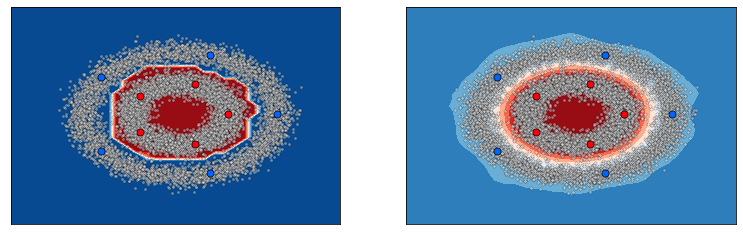

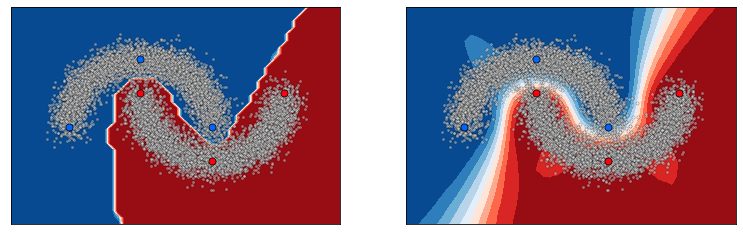

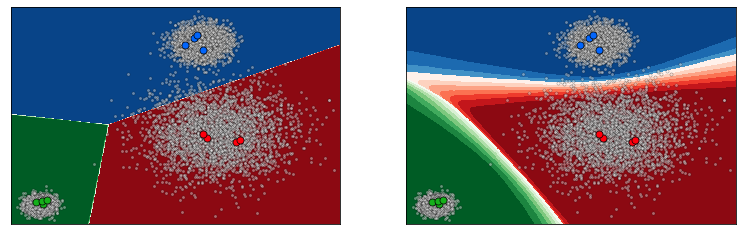

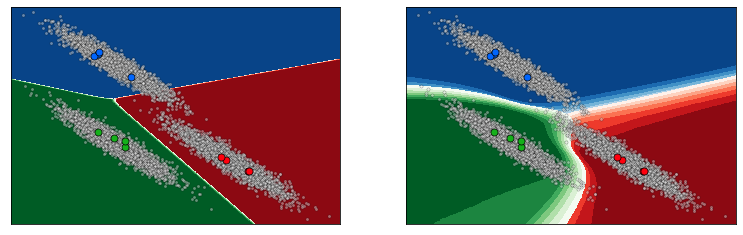

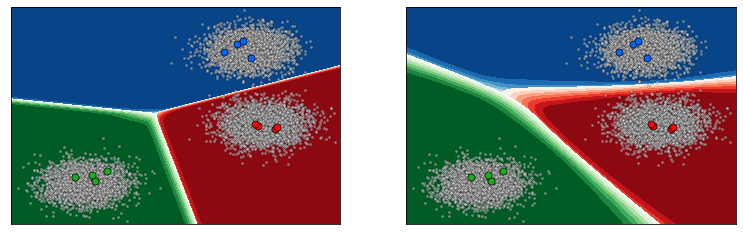

In [11]:
models = [("SelfTraining MLP",SelfTrainingMeta(MLPClassifier(solver="lbfgs"), max_iter=50)), 
          ("LabelSpreading",LabelSpreading())]

is_hard = False

for d in DATASETS:
    if d in ["cifar10","svhn","mnist"]:
        pass
    else:
        F,axs=plt.subplots(1,2, figsize=(13,4))
        train, dev, test = get_train_dev_test_ssl(d, n_labels=None, is_hard=is_hard)

        for i,(name, basemodel) in enumerate(models):
            print(name)
            m = basemodel.fit(train.X, train.y)
            plot_2D_decision_boundary_SSL(train.X, train.y, m, mesh_stepsize=0.1, ax=axs[i])
            print(name, "dev score: %s" % m.score(dev.X, dev.y))
            print(name, "test score: %s" % m.score(test.X, test.y))
            print()
        

In [15]:
t=t.unsqueeze(1)

In [7]:
import torch
t=torch.nn.functional.one_hot(torch.arange(6).view(2,3))

# Hard Data

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 6 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.965
SelfTraining MLP test score: 0.9616

LabelSpreading
LabelSpreading dev score: 0.949
LabelSpreading test score: 0.9436

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 14 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.94
SelfTraining MLP test score: 0.9362

LabelSpreading
LabelSpreading dev score: 0.969
LabelSpreading test score: 0.966

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 4 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.946
SelfTraining MLP test score: 0.9432

LabelSpreading
LabelSpreading dev score: 0.97
LabelSpreading test score: 0.964

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 4 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.973
SelfTraining MLP test score: 0.9757

LabelSpreading
LabelSpreading dev score: 0.952
LabelSpreading test score: 0.9521

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 8 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.991
SelfTraining MLP test score: 0.9878

LabelSpreading
LabelSpreading dev score: 0.993
LabelSpreading test score: 0.9924



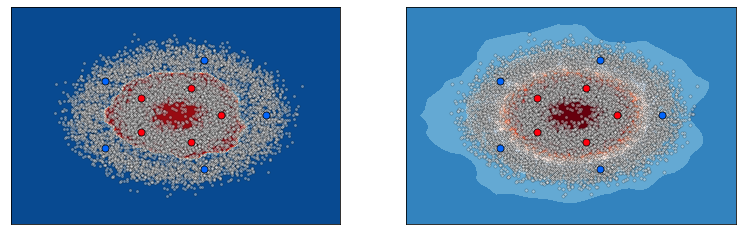

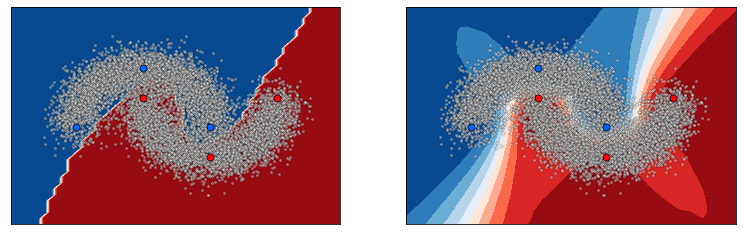

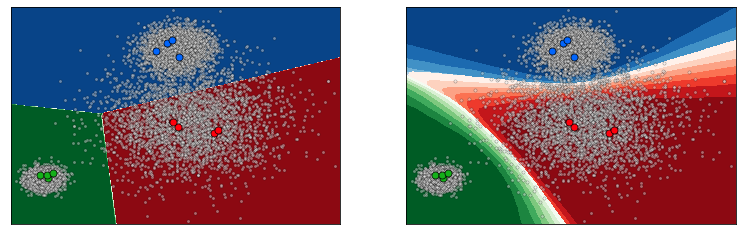

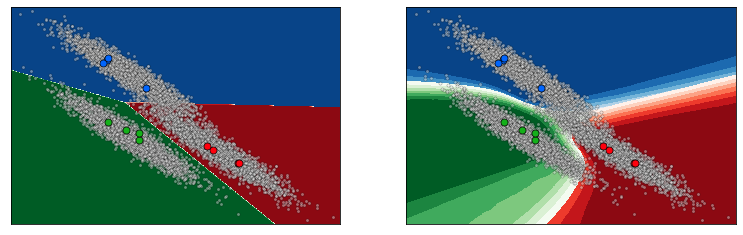

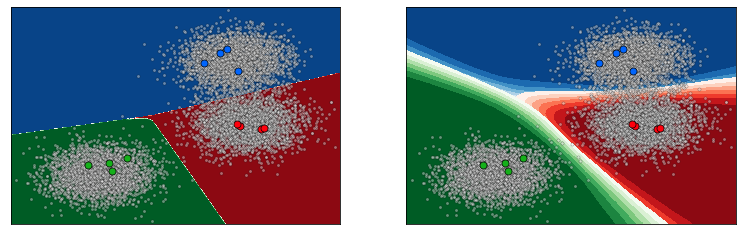

In [14]:
from sklearn.neural_network import MLPClassifier
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta

models = [("SelfTraining MLP",SelfTrainingMeta(MLPClassifier(solver="lbfgs"), max_iter=50)), 
          ("LabelSpreading",LabelSpreading())]

is_hard = True

for d in DATASETS:
    if d in ["cifar10","svhn","mnist"]:
        pass
    else:
        F,axs=plt.subplots(1,2, figsize=(13,4))
        train, dev, test = get_train_dev_test_ssl(d, n_labels=None, is_hard=is_hard)

        for i,(name, basemodel) in enumerate(models):
            print(name)
            m = basemodel.fit(train.X, train.y)
            plot_2D_decision_boundary_SSL(train.X, train.y, m, mesh_stepsize=0.1, ax=axs[i])
            print(name, "dev score: %s" % m.score(dev.X, dev.y))
            print(name, "test score: %s" % m.score(test.X, test.y))
            print()
        